In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from pandas_profiling import ProfileReport

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#bmi, skinthinkness, pregencies, insulin,BloodPressure => zero value present 

In [13]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

In [14]:
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [15]:
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())

In [17]:
data['Pregnancies'] = data['Pregnancies'].replace(0, data['Pregnancies'].mean())

<AxesSubplot:>

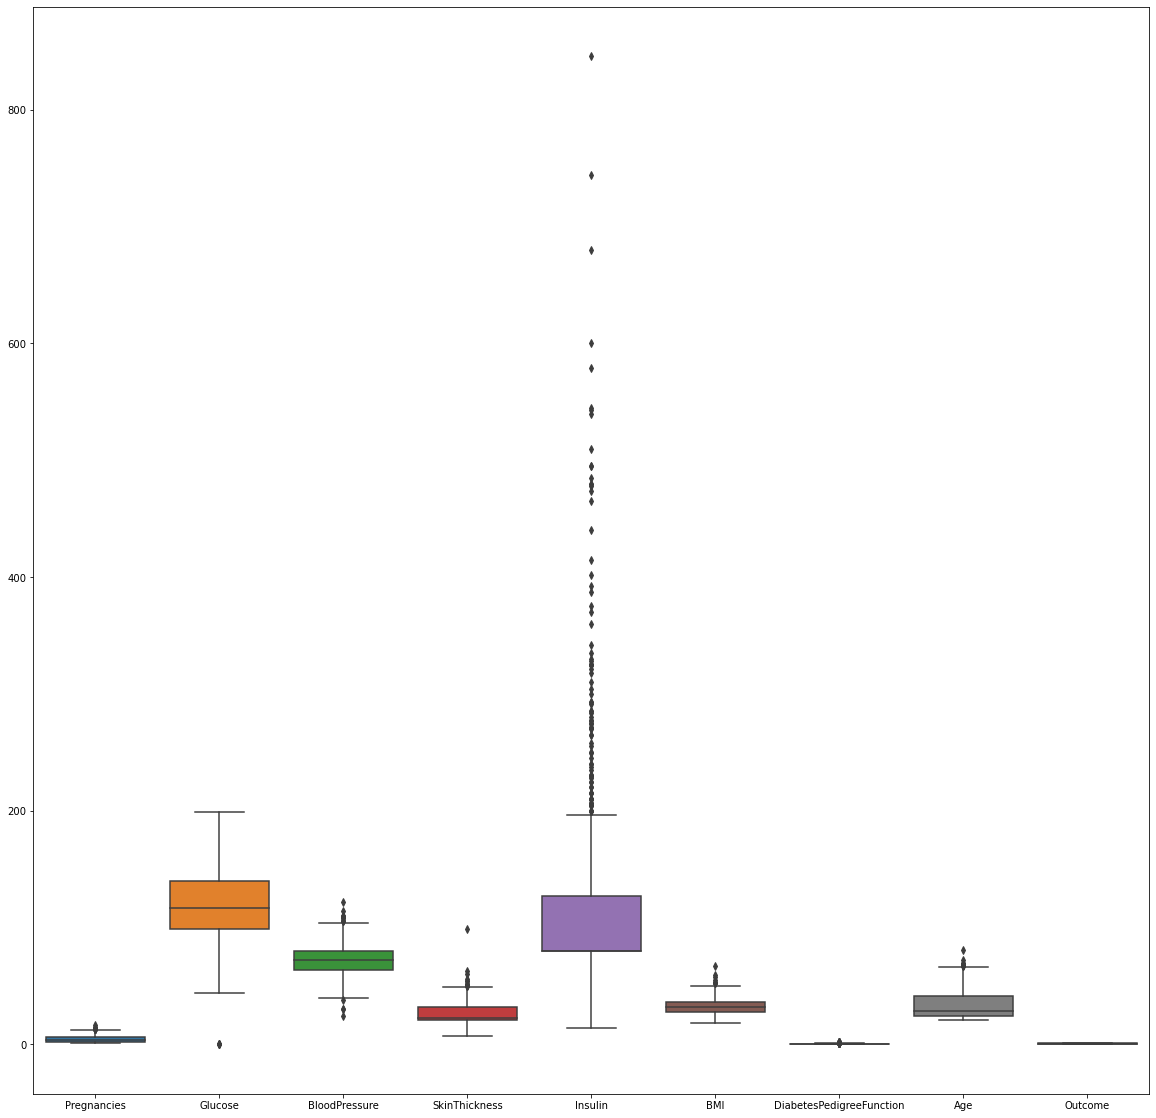

In [19]:
# Checking for outlier
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data, ax = ax)

In [20]:
# Removing outlier from BloodPressure column
q = data['BloodPressure'].quantile(0.99)
data = data[data['BloodPressure']<q]

# Removing outlier from SkinThickness column
q = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness']<q]

# Removing outlier from Insulin column
q = data['Insulin'].quantile(0.95)
data = data[data['Insulin']<q]

# Removing outlier from BMI column
q = data['BMI'].quantile(0.99)
data = data[data['BMI']<q]

# Removing outlier from Age column
q = data['Age'].quantile(0.99)
data = data[data['Age']<q]

<AxesSubplot:>

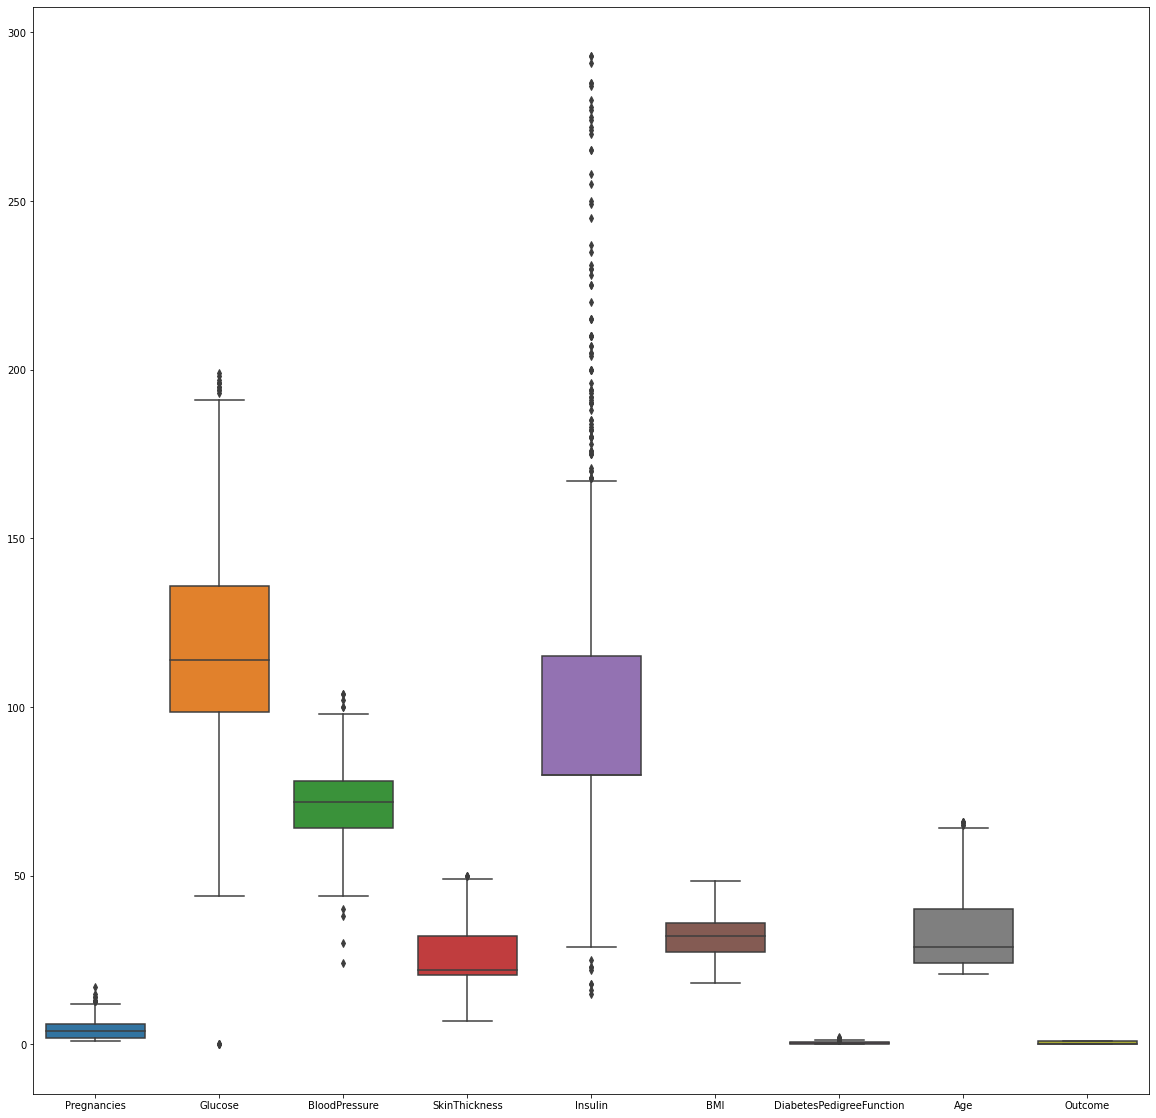

In [21]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data, ax = ax)

In [22]:
data.shape

(695, 9)

In [25]:
#again removing outlier from BloodPressure column
q = data['BloodPressure'].quantile(0.99)
data = data[data['BloodPressure']<q]

# again removing outlier from Insulin column
q = data['Insulin'].quantile(0.97)
data = data[data['Insulin']<q]

<AxesSubplot:>

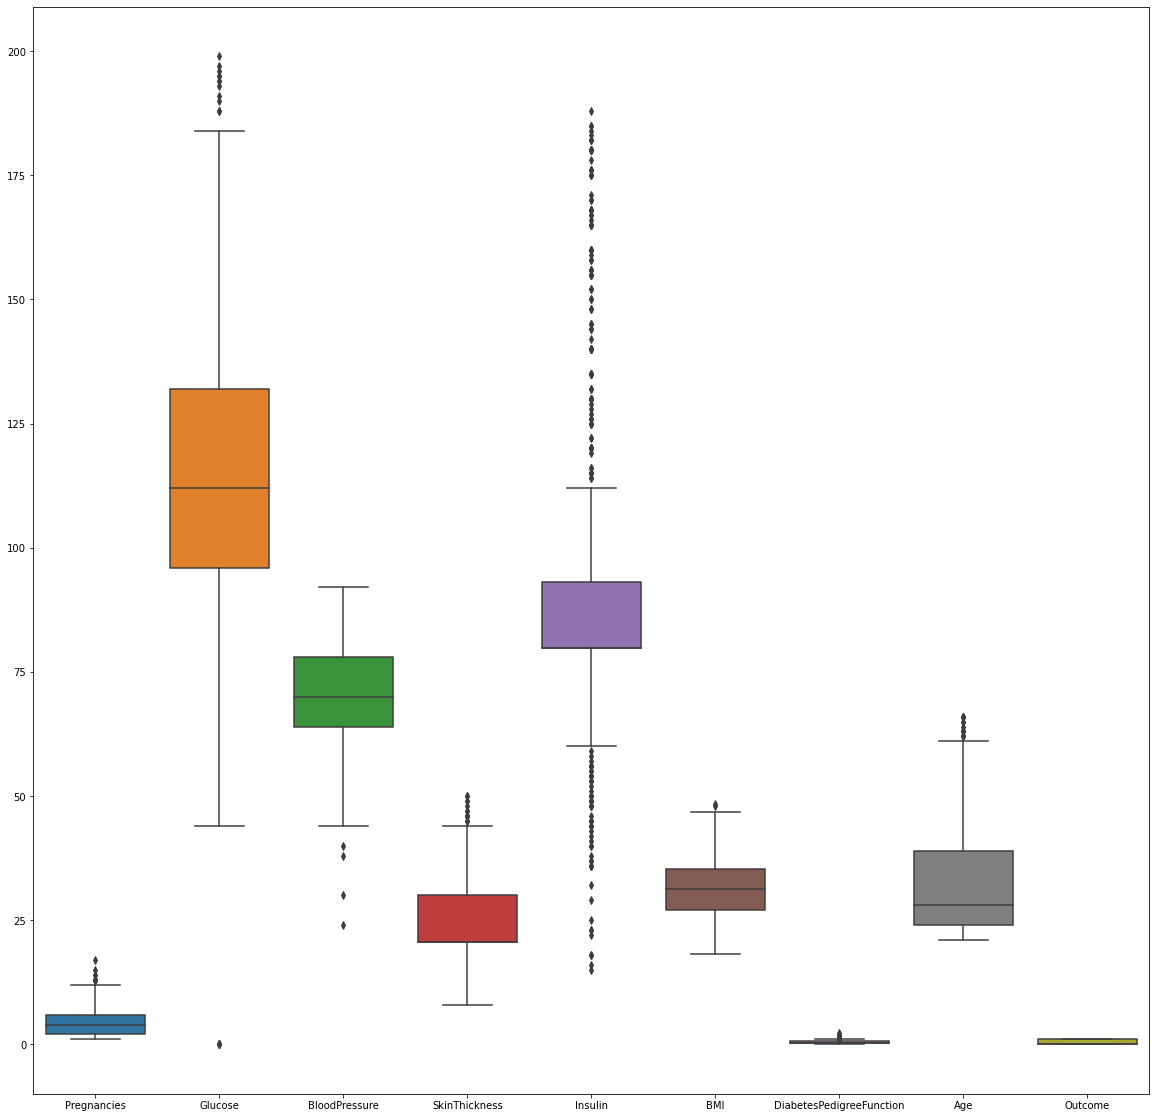

In [26]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data, ax = ax)

In [27]:
data.shape

(619, 9)

In [29]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183,64.0,20.536458,79.799479,23.3,0.672,32,1


In [30]:
x = data.drop(columns = ['Outcome'])

In [31]:
y = data.Outcome

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,79.799479,33.6,0.627,50,1


In [43]:
pd.DataFrame(x_scaled, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.552589,1.066890,0.117995,1.199859,-0.327922,0.344917,0.573081,1.636532
1,-1.120579,-1.020692,-0.447817,0.468966,-0.327922,-0.793624,-0.316518,-0.116246
2,1.221857,2.226657,-0.636421,-0.562026,-0.327922,-1.330365,0.718125,-0.023994
3,-1.120579,-0.888147,-0.447817,-0.261928,0.117458,-0.549651,-0.909584,-1.038760
4,-0.168529,0.702391,-2.899669,1.199859,2.438364,1.890080,5.926794,0.068257
...,...,...,...,...,...,...,...,...
614,1.891124,-0.490512,0.495203,2.783462,2.814727,0.231063,-0.896691,2.835801
615,-0.785946,0.205348,-0.070609,0.225334,-0.327922,0.865393,-0.351973,-0.485252
616,0.217956,0.172212,0.117995,-0.261928,0.682002,-0.858684,-0.658176,-0.208497
617,-1.120579,0.337893,-1.013629,-0.562026,-0.327922,-0.224354,-0.322964,1.359778


In [45]:
x_scaled

array([[ 0.55258923,  1.06688961,  0.11799471, ...,  0.34491701,
         0.57308146,  1.6365319 ],
       [-1.12057933, -1.02069163, -0.44781718, ..., -0.79362431,
        -0.31651792, -0.11624578],
       [ 1.22185666,  2.22665696, -0.63642115, ..., -1.33036522,
         0.71812484, -0.02399432],
       ...,
       [ 0.21795552,  0.17221194,  0.11799471, ..., -0.85868382,
        -0.65817566, -0.20849723],
       [-1.12057933,  0.33789299, -1.01362908, ..., -0.22435365,
        -0.3229643 ,  1.35977753],
       [-1.12057933, -0.75560195, -0.07060925, ..., -0.17555903,
        -0.43255263, -0.85425743]])

In [46]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 619, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=30)

In [48]:
naive_bayes = GaussianNB()

In [49]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [50]:
naive_bayes.score(x_test, y_test)

0.8064516129032258

In [51]:
naive_bayes.score(x_train, y_train)

0.7672413793103449

In [52]:
x_scaled.shape

(619, 8)

In [53]:
x_scaled.shape[1]

8

In [58]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif score'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['column'] = x.columns

vif

,vif score,column
0,1.457664,Pregnancies
1,1.240781,Glucose
2,1.235492,BloodPressure
3,1.382167,SkinThickness
4,1.173040,Insulin
5,1.437041,BMI
6,1.042129,DiabetesPedigreeFunction
7,1.606830,Age
